## Import libraries and Setup

In [1]:
# Common imports
import os
import numpy as np

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# TensorFlow imports
# may differs from version to versions

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Dataset information

image_folder = os.path.join('datasets', 'face_dataset_train_images')
img_height, img_width = 250, 250  # size of images
num_classes = 2  # me - not_me

# 'face_dataset_train_images' and 'face_dataset_test_images' folders follow next structure:
# | - dataset_folder (face_dataset_train_images/face_dataset_test_images)
#     | - class_1
#         | - img1.jpg
#         | - img2.jpg
#         | - ...
#     | - class_2
#         | - img1.jpg
#         | - img2.jpg
#         | - ...
#     | - ...

# In my case
# | - face_dataset_train_images
#     | - me
#         | - ...
#     | - not_me
#         | - ...

## Look at the data 

In [5]:
dataset = keras.preprocessing.image_dataset_from_directory(
    image_folder,
    seed=42,
    image_size=(img_height, img_width),
    label_mode='categorical',
    shuffle=True)

# Initial dataset is 195 images, but it can became several times larger

Found 41 files belonging to 2 classes.


In [6]:
class_names = dataset.class_names
class_names

['me', 'not_me']

In [8]:
# Helper function to get classname of the image
def get_classname(class_names, mask):
    '''
    Returns an element of the array 'class_names' with the index
    where the maximum value from the 'mask' array is located.
    Used to get classname with categorical labels.

    Parameters:
        class_names (array-like): Target array
        mask (array-like): Mask array, elements must be numbers
    Returns:
        One of the element from 'class_names'

    >>> get_classname(['first', 'second'], [0, 1])
    'second'
    >>> get_classname(['first', 'second', third], [1, 0, 0])
    'first'
    '''

    assert len(class_names) == len(
        mask), "The arrays must be of the same length"

    return class_names[np.array(mask).argmax(axis=0)]

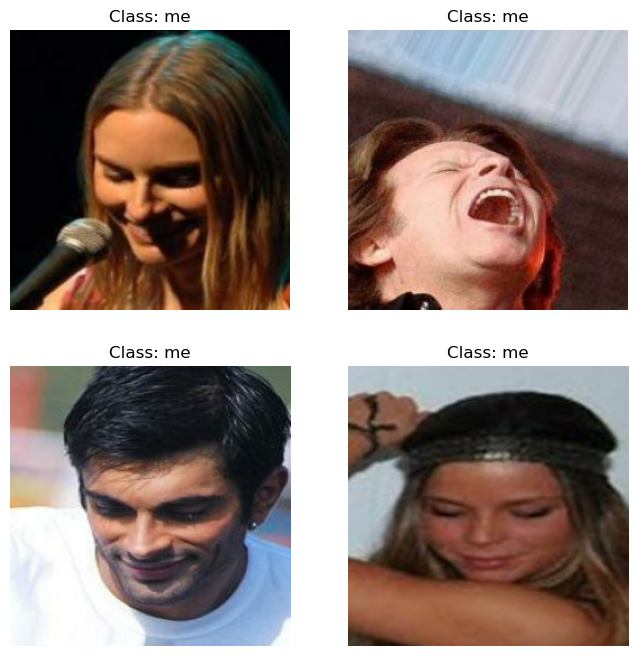

In [9]:
sqrt_img = 2  # images per row / col.
# The square root of the total number of images shown

plt.figure(figsize=(8, 8))
for images, labels in dataset.take(3):
    for index in range(sqrt_img**2):
        # grid 'sqrt_img' x 'sqrt_img'
        plt.subplot(sqrt_img, sqrt_img, index + 1)
        plt.imshow(images[index] / 255)
        class_name = get_classname(class_names, labels[index])
        plt.title("Class: {}".format(class_name))
        plt.axis("off")

## Data Augmentation

In [10]:
batch_size = 16

In [11]:
# Create data generator based on ImageDataGenerator object

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.7, 1),
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    image_folder,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 41 images belonging to 2 classes.


In [12]:
# To see next augmented image
image, label = train_generator.next()

plt.figure(figsize=(6, 6))
plt.imshow(image[0] / 255)  # first image from batch
plt.title("Augmented image from ImageDataGenerator")
plt.axis("off")

NameError: name 'ndimage' is not defined

### Option 1 - Generate n * batch_size random samples

In [22]:
n = 10

aug_image_folder = os.path.join('datasets', 'face_dataset_train_aug_images')
if not os.path.exists(aug_image_folder):
    os.makedirs(aug_image_folder)  # create folder if doesn't exist

# Note that the content of the folder is not deleted and files are added at every step

In [23]:
train_generator.save_to_dir = aug_image_folder
train_generator.save_format = 'jpg'

# If 'save_to_dir' is set, `next()` method
# will generate `batch_size` images each time 
# and save them to 'save_to_dir' folder

for i in range(n):
    print("Step {} of {}".format(i+1, n))
    train_generator.next()
    print("\tGenerate {} random images".format(train_generator.batch_size))

print("\nTotal number images generated = {}".format(n*train_generator.batch_size))

Step 1 of 10
	Generate 16 random images
Step 2 of 10
	Generate 16 random images
Step 3 of 10
	Generate 16 random images
Step 4 of 10
	Generate 16 random images
Step 5 of 10
	Generate 16 random images
Step 6 of 10
	Generate 16 random images
Step 7 of 10
	Generate 16 random images
Step 8 of 10
	Generate 16 random images
Step 9 of 10
	Generate 16 random images
Step 10 of 10
	Generate 16 random images

Total number images generated = 160


In [24]:
# One of the problem is to label data again - so you need to create two ImageDataGenerator objects

# This example is good, and this dataset can be successfully used to train CNN, 
# but if you want to get more control, we can set number of images we want to get explicitly

### Option 2 - Generate n samples for each image

In [13]:
n = 5

aug_image_folder = os.path.join('datasets', 'face_dataset_train_aug_images')
if not os.path.exists(aug_image_folder):
    os.makedirs(aug_image_folder)  # create folder if doesn't exist

# Note that the content of the folder is not deleted and files are added at every step

In [14]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.7, 1),
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

In [15]:
# classes: 'me' and 'not_me'
image_folder_to_generate = os.path.join(image_folder, 'me')
image_folder_to_save = os.path.join(aug_image_folder, 'me')
if not os.path.exists(image_folder_to_save):
    os.makedirs(image_folder_to_save)  # create folder if doesn't exist

i = 0
total = len(os.listdir(image_folder_to_generate))  # number of files in folder
for filename in os.listdir(image_folder_to_generate):
    print("Step {} of {}".format(i+1, total))
    # for each image in folder: read it
    image_path = os.path.join(image_folder_to_generate, filename)
    image = keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width, 3))
    image = keras.preprocessing.image.img_to_array(
        image)  # from image to array
    # shape from (250, 250, 3) to (1, 250, 250, 3)
    image = np.expand_dims(image, axis=0)

    # create ImageDataGenerator object for it
    current_image_gen = train_datagen.flow(image,
                                           batch_size=1,
                                           save_to_dir=image_folder_to_save,
                                           save_prefix=filename,
                                           save_format="jpg")

    # generate n samples
    count = 0
    for image in current_image_gen:  # accessing the object saves the image to disk
        count += 1
        if count == n:  # n images were generated
            break
    print('\tGenerate {} samples for file {}'.format(n, filename))
    i += 1

print("\nTotal number images generated = {}".format(n*total))

Step 1 of 21


NameError: name 'ndimage' is not defined